In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# need to change path name
df = pd.read_csv("data/qtm350_final.csv")

In [62]:
df.dtypes

Country                         object
Year                             int64
gdp_per_capita_constant_usd    float64
primary_school_enrollment      float64
basic_water_access_pct         float64
basic_sanitation_access_pct    float64
life_expectancy_birth          float64
Region                          object
dtype: object

In [ ]:
#Check for NAs and drop them
df[[
    "life_expectancy_birth",
    "basic_water_access_pct",
    "basic_sanitation_access_pct",
    "primary_school_enrollment",
    "gdp_per_capita_constant_usd"
]].isna().sum()

df_clean = df.replace([np.inf, -np.inf], np.nan).dropna(subset=[
    "life_expectancy_birth",
    "basic_water_access_pct",
    "basic_sanitation_access_pct",
    "primary_school_enrollment",
    "gdp_per_capita_constant_usd"
])

### One regression line for all the data

In [ ]:
#One multiple regression ran on all variables, not including region

Y = df_clean["life_expectancy_birth"]
X = df_clean[[
    "basic_water_access_pct",
    "basic_sanitation_access_pct",
    "primary_school_enrollment",
    "gdp_per_capita_constant_usd"
]]

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
print(model.summary())


                              OLS Regression Results                             
Dep. Variable:     life_expectancy_birth   R-squared:                       0.469
Model:                               OLS   Adj. R-squared:                  0.466
Method:                    Least Squares   F-statistic:                     195.1
Date:                   Sun, 23 Nov 2025   Prob (F-statistic):          6.38e-120
Time:                           23:38:15   Log-Likelihood:                -2786.4
No. Observations:                    890   AIC:                             5583.
Df Residuals:                        885   BIC:                             5607.
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

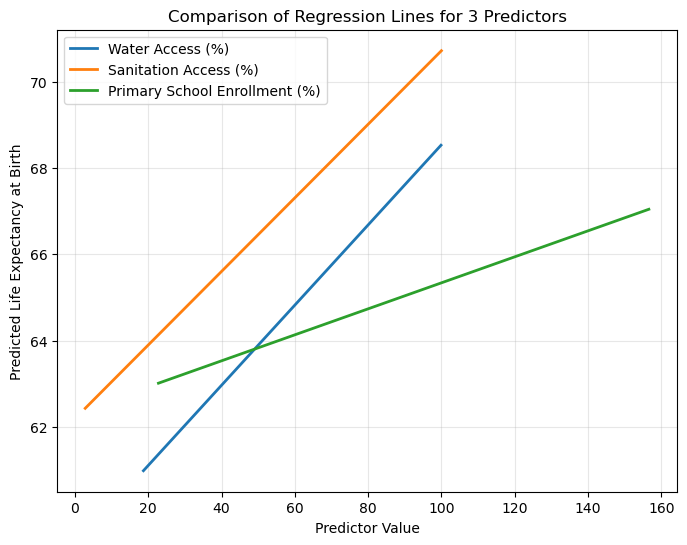

In [81]:
#One plot with all 3 slopes for each X var

vars_to_plot = {
    "basic_water_access_pct": "Water Access (%)",
    "basic_sanitation_access_pct": "Sanitation Access (%)",
    "primary_school_enrollment": "Primary School Enrollment (%)"
}

plt.figure(figsize=(8, 6))

for x_var, label in vars_to_plot.items():
    # X range for this variable
    x_range = np.linspace(df_clean[x_var].min(), df_clean[x_var].max(), 100)

    # Means of other X vars
    mean_vals = {
        "basic_water_access_pct": df_clean["basic_water_access_pct"].mean(),
        "basic_sanitation_access_pct": df_clean["basic_sanitation_access_pct"].mean(),
        "primary_school_enrollment": df_clean["primary_school_enrollment"].mean(),
        "gdp_per_capita_constant_usd": df_clean["gdp_per_capita_constant_usd"].mean()
    }

    # Build prediction using the model
    predicted_y = (
        model.params["const"]
        + model.params["basic_water_access_pct"] * (x_range if x_var == "basic_water_access_pct" else mean_vals["basic_water_access_pct"])
        + model.params["basic_sanitation_access_pct"] * (x_range if x_var == "basic_sanitation_access_pct" else mean_vals["basic_sanitation_access_pct"])
        + model.params["primary_school_enrollment"] * (x_range if x_var == "primary_school_enrollment" else mean_vals["primary_school_enrollment"])
        + model.params["gdp_per_capita_constant_usd"] * mean_vals["gdp_per_capita_constant_usd"]
    )

    # Plot line
    plt.plot(x_range, predicted_y, label=label, linewidth=2)

plt.xlabel("Predictor Value")
plt.ylabel("Predicted Life Expectancy at Birth")
plt.title("Comparison of Regression Lines for 3 Predictors")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


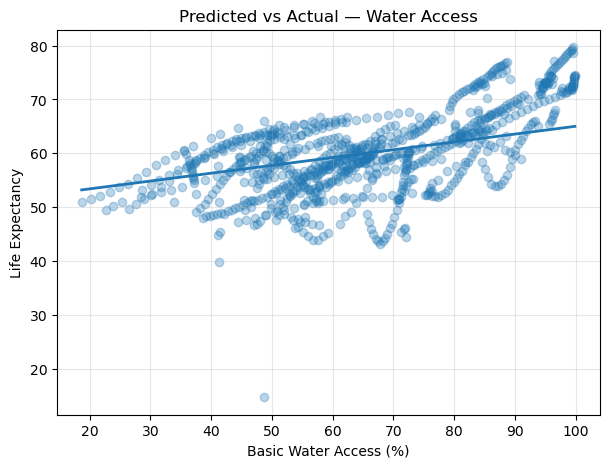

In [66]:
# Water Access: Predicted vs Actual
x_var = "basic_water_access_pct"
x_range = np.linspace(df_clean[x_var].min(), df_clean[x_var].max(), 100)

# Compute predicted Y holding others at means
pred_y = (
    model.params["const"]
    + model.params["basic_water_access_pct"] * x_range
    + model.params["basic_sanitation_access_pct"] * df_clean["basic_sanitation_access_pct"].mean()
    + model.params["primary_school_enrollment"] * df_clean["primary_school_enrollment"].mean()
    + model.params["gdp_per_capita_constant_usd"] * df_clean["gdp_per_capita_constant_usd"].mean()
)

plt.figure(figsize=(7,5))
plt.scatter(df_clean[x_var], df_clean["life_expectancy_birth"], alpha=0.3)
plt.plot(x_range, pred_y, linewidth=2)
plt.xlabel("Basic Water Access (%)")
plt.ylabel("Life Expectancy")
plt.title("Predicted vs Actual — Water Access")
plt.grid(alpha=0.3)
plt.show()

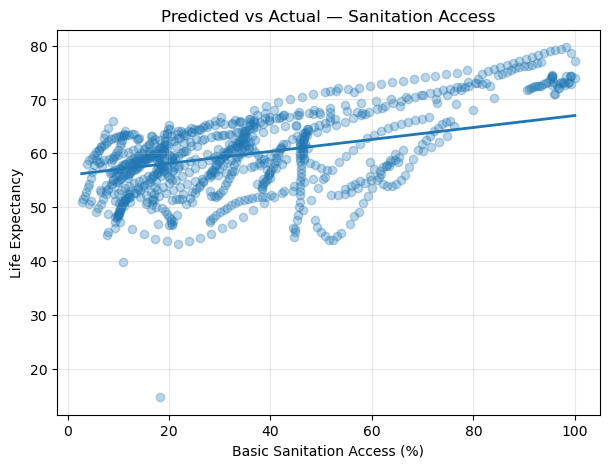

In [67]:
# Sanitation Access: Predicted vs Actual
x_var = "basic_sanitation_access_pct"
x_range = np.linspace(df_clean[x_var].min(), df_clean[x_var].max(), 100)

pred_y = (
    model.params["const"]
    + model.params["basic_water_access_pct"] * df_clean["basic_water_access_pct"].mean()
    + model.params["basic_sanitation_access_pct"] * x_range
    + model.params["primary_school_enrollment"] * df_clean["primary_school_enrollment"].mean()
    + model.params["gdp_per_capita_constant_usd"] * df_clean["gdp_per_capita_constant_usd"].mean()
)

plt.figure(figsize=(7,5))
plt.scatter(df_clean[x_var], df_clean["life_expectancy_birth"], alpha=0.3)
plt.plot(x_range, pred_y, linewidth=2)
plt.xlabel("Basic Sanitation Access (%)")
plt.ylabel("Life Expectancy")
plt.title("Predicted vs Actual — Sanitation Access")
plt.grid(alpha=0.3)
plt.show()


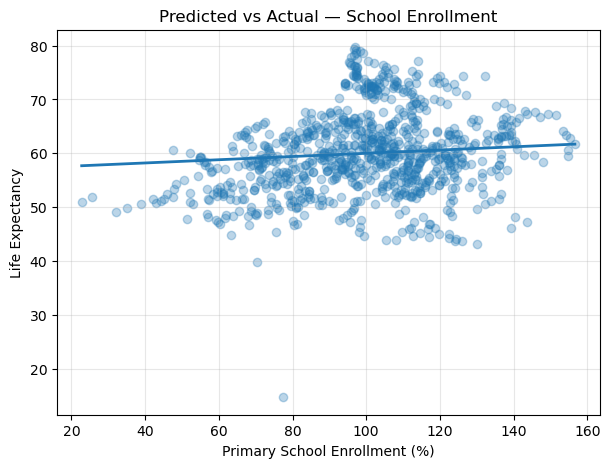

In [68]:
# School Enrollment: Predicted vs Actual
x_var = "primary_school_enrollment"
x_range = np.linspace(df_clean[x_var].min(), df_clean[x_var].max(), 100)

pred_y = (
    model.params["const"]
    + model.params["basic_water_access_pct"] * df_clean["basic_water_access_pct"].mean()
    + model.params["basic_sanitation_access_pct"] * df_clean["basic_sanitation_access_pct"].mean()
    + model.params["primary_school_enrollment"] * x_range
    + model.params["gdp_per_capita_constant_usd"] * df_clean["gdp_per_capita_constant_usd"].mean()
)

plt.figure(figsize=(7,5))
plt.scatter(df_clean[x_var], df_clean["life_expectancy_birth"], alpha=0.3)
plt.plot(x_range, pred_y, linewidth=2)
plt.xlabel("Primary School Enrollment (%)")
plt.ylabel("Life Expectancy")
plt.title("Predicted vs Actual — School Enrollment")
plt.grid(alpha=0.3)
plt.show()


### Parallel Lines Model for Each Region

In [69]:
#Create column for Sub-Saharan Africa binary variable (1=Africa, 0=Asia)
df_clean["Binary_subsaharan_africa"] = (df_clean["Region"] == "Sub-Saharan Africa").astype(int)

#Run regression with region, parallel lines model (where two regions have parallel lines: same slope, different intercepts)
#Life Expectancy=β0​+β1​Water+β2​Sanitation+β3​School+β4​GDP+β5​RegionBinary

Y = df_clean["life_expectancy_birth"]
X = df_clean[[
    "basic_water_access_pct",
    "basic_sanitation_access_pct",
    "primary_school_enrollment",
    "gdp_per_capita_constant_usd",
    "Binary_subsaharan_africa"
]]

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     life_expectancy_birth   R-squared:                       0.515
Model:                               OLS   Adj. R-squared:                  0.513
Method:                    Least Squares   F-statistic:                     188.0
Date:                   Sun, 23 Nov 2025   Prob (F-statistic):          2.31e-136
Time:                           23:38:16   Log-Likelihood:                -2745.5
No. Observations:                    890   AIC:                             5503.
Df Residuals:                        884   BIC:                             5532.
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

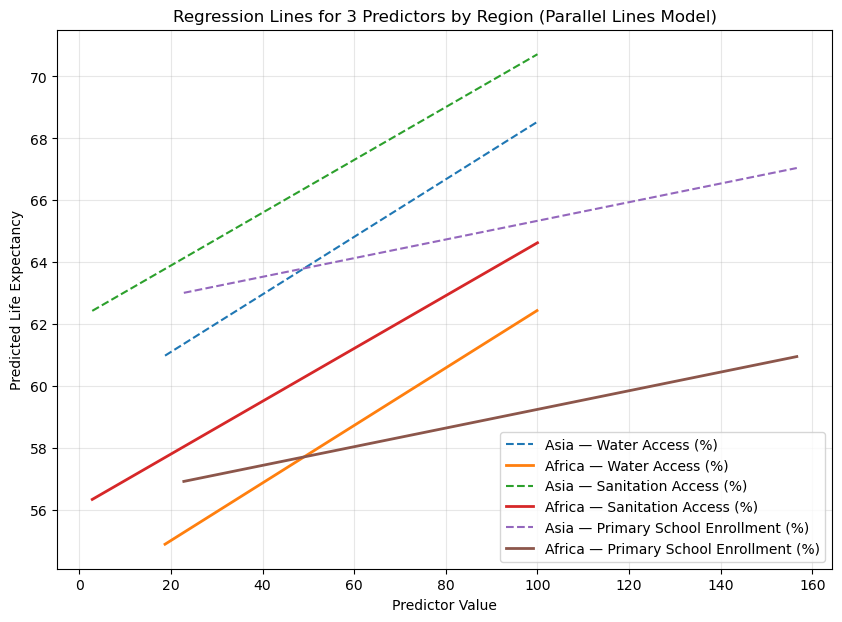

In [ ]:
# One plot with all 6 lines for both regions

x_vars = {
    "basic_water_access_pct": "Water Access (%)",
    "basic_sanitation_access_pct": "Sanitation Access (%)",
    "primary_school_enrollment": "Primary School Enrollment (%)"
}

plt.figure(figsize=(10, 7))

# Means of non-varied predictors
means = {
    "basic_water_access_pct": df_clean["basic_water_access_pct"].mean(),
    "basic_sanitation_access_pct": df_clean["basic_sanitation_access_pct"].mean(),
    "primary_school_enrollment": df_clean["primary_school_enrollment"].mean(),
    "gdp_per_capita_constant_usd": df_clean["gdp_per_capita_constant_usd"].mean()
}

for x_var, label in x_vars.items():

    x_range = np.linspace(df_clean[x_var].min(), df_clean[x_var].max(), 100)

    # predicted for Asia (0)
    pred_asia = (
        model.params["const"]
        + model.params["Binary_subsaharan_africa"] * 0
        + model.params["gdp_per_capita_constant_usd"] * means["gdp_per_capita_constant_usd"]
        + model.params["basic_water_access_pct"] * (x_range if x_var == "basic_water_access_pct" else means["basic_water_access_pct"])
        + model.params["basic_sanitation_access_pct"] * (x_range if x_var == "basic_sanitation_access_pct" else means["basic_sanitation_access_pct"])
        + model.params["primary_school_enrollment"] * (x_range if x_var == "primary_school_enrollment" else means["primary_school_enrollment"])
    )

    # predicted for Africa (1)
    pred_africa = pred_asia + model.params["Binary_subsaharan_africa"]

    # Plot both
    plt.plot(x_range, pred_asia, label=f"Asia — {label}", linestyle="--")
    plt.plot(x_range, pred_africa, label=f"Africa — {label}", linewidth=2)

plt.xlabel("Predictor Value")
plt.ylabel("Predicted Life Expectancy")
plt.title("Regression Lines for 3 Predictors by Region (Parallel Lines Model)")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


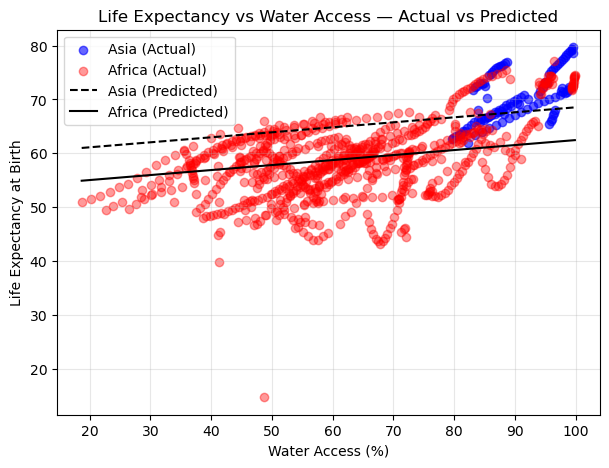

In [ ]:
# Water Access: Predicted vs Actual (Parallel Lines Model)

x_var = "basic_water_access_pct"
label = "Water Access (%)"
x_range = np.linspace(df_clean[x_var].min(), df_clean[x_var].max(), 150)

# Mean values for other predictors
means = {
    "basic_sanitation_access_pct": df_clean["basic_sanitation_access_pct"].mean(),
    "primary_school_enrollment": df_clean["primary_school_enrollment"].mean(),
    "gdp_per_capita_constant_usd": df_clean["gdp_per_capita_constant_usd"].mean()
}

# Predicted life expectancy for Asia
pred_asia = (
    model.params["const"]
    + model.params["basic_water_access_pct"] * x_range
    + model.params["basic_sanitation_access_pct"] * means["basic_sanitation_access_pct"]
    + model.params["primary_school_enrollment"] * means["primary_school_enrollment"]
    + model.params["gdp_per_capita_constant_usd"] * means["gdp_per_capita_constant_usd"]
)

# Africa prediction = Asia + region intercept
pred_africa = pred_asia + model.params["Binary_subsaharan_africa"]

plt.figure(figsize=(7,5))

# Asia scatter (blue)
plt.scatter(
    df_clean.loc[df_clean["Binary_subsaharan_africa"] == 0, x_var],
    df_clean.loc[df_clean["Binary_subsaharan_africa"] == 0, "life_expectancy_birth"],
    c="blue",
    alpha=0.6,
    label="Asia (Actual)"
)

# Africa scatter (red)
plt.scatter(
    df_clean.loc[df_clean["Binary_subsaharan_africa"] == 1, x_var],
    df_clean.loc[df_clean["Binary_subsaharan_africa"] == 1, "life_expectancy_birth"],
    c="red",
    alpha=0.4,
    label="Africa (Actual)"
)

# Predicted lines
plt.plot(x_range, pred_asia, "k--", label="Asia (Predicted)")
plt.plot(x_range, pred_africa, "k-", label="Africa (Predicted)")

plt.xlabel(label)
plt.ylabel("Life Expectancy at Birth")
plt.title("Life Expectancy vs Water Access — Actual vs Predicted")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


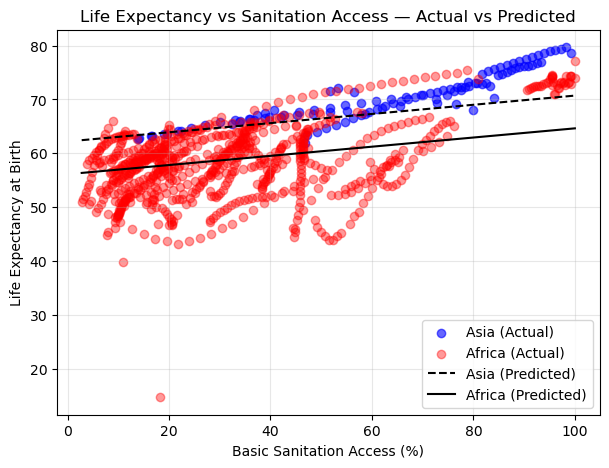

In [78]:
# Sanitation Access: Predicted vs Actual (Parallel Lines Model)

x_var = "basic_sanitation_access_pct"
x_range = np.linspace(df_clean[x_var].min(), df_clean[x_var].max(), 150)

# Mean values for other predictors
means = {
    "basic_water_access_pct": df_clean["basic_water_access_pct"].mean(),
    "primary_school_enrollment": df_clean["primary_school_enrollment"].mean(),
    "gdp_per_capita_constant_usd": df_clean["gdp_per_capita_constant_usd"].mean()
}

# Predictions for Asia
pred_asia = (
    model.params["const"]
    + model.params["basic_water_access_pct"] * means["basic_water_access_pct"]
    + model.params["primary_school_enrollment"] * means["primary_school_enrollment"]
    + model.params["gdp_per_capita_constant_usd"] * means["gdp_per_capita_constant_usd"]
    + model.params["basic_sanitation_access_pct"] * x_range
)
# Predictions for Africa
pred_africa = pred_asia + model.params["Binary_subsaharan_africa"]

# Plot
plt.figure(figsize=(7,5))
plt.scatter(
    df_clean.loc[df_clean["Binary_subsaharan_africa"] == 0, x_var],
    df_clean.loc[df_clean["Binary_subsaharan_africa"] == 0, "life_expectancy_birth"],
    c="blue", alpha=0.6, label="Asia (Actual)"
)
plt.scatter(
    df_clean.loc[df_clean["Binary_subsaharan_africa"] == 1, x_var],
    df_clean.loc[df_clean["Binary_subsaharan_africa"] == 1, "life_expectancy_birth"],
    c="red", alpha=0.4, label="Africa (Actual)"
)
plt.plot(x_range, pred_asia, "k--", label="Asia (Predicted)")
plt.plot(x_range, pred_africa, "k-", label="Africa (Predicted)")

plt.xlabel("Basic Sanitation Access (%)")
plt.ylabel("Life Expectancy at Birth")
plt.title("Life Expectancy vs Sanitation Access — Actual vs Predicted")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


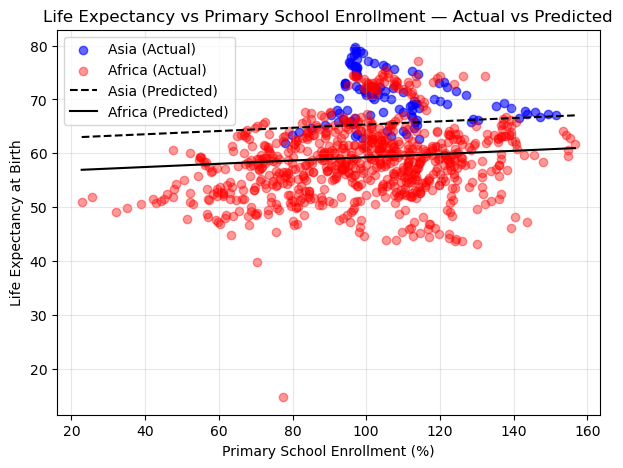

In [79]:
# Primary School Enrollment: Predicted vs Actual (Parallel Lines Model)

x_var = "primary_school_enrollment"
x_range = np.linspace(df_clean[x_var].min(), df_clean[x_var].max(), 150)

# Mean values for other predictors
means = {
    "basic_water_access_pct": df_clean["basic_water_access_pct"].mean(),
    "basic_sanitation_access_pct": df_clean["basic_sanitation_access_pct"].mean(),
    "gdp_per_capita_constant_usd": df_clean["gdp_per_capita_constant_usd"].mean()
}

# Predictions for Asia
pred_asia = (
    model.params["const"]
    + model.params["basic_water_access_pct"] * means["basic_water_access_pct"]
    + model.params["basic_sanitation_access_pct"] * means["basic_sanitation_access_pct"]
    + model.params["gdp_per_capita_constant_usd"] * means["gdp_per_capita_constant_usd"]
    + model.params["primary_school_enrollment"] * x_range
)
# Predictions for Africa
pred_africa = pred_asia + model.params["Binary_subsaharan_africa"]

# Plot
plt.figure(figsize=(7,5))
plt.scatter(
    df_clean.loc[df_clean["Binary_subsaharan_africa"] == 0, x_var],
    df_clean.loc[df_clean["Binary_subsaharan_africa"] == 0, "life_expectancy_birth"],
    c="blue", alpha=0.6, label="Asia (Actual)"
)
plt.scatter(
    df_clean.loc[df_clean["Binary_subsaharan_africa"] == 1, x_var],
    df_clean.loc[df_clean["Binary_subsaharan_africa"] == 1, "life_expectancy_birth"],
    c="red", alpha=0.4, label="Africa (Actual)"
)
plt.plot(x_range, pred_asia, "k--", label="Asia (Predicted)")
plt.plot(x_range, pred_africa, "k-", label="Africa (Predicted)")

plt.xlabel("Primary School Enrollment (%)")
plt.ylabel("Life Expectancy at Birth")
plt.title("Life Expectancy vs Primary School Enrollment — Actual vs Predicted")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### Interaction Model Where Each Region Has Its Own Slope

In [ ]:
#Interaction model (where two regions have different slopes and intercepts)

# Create interaction terms
df_clean["water_x_region"] = df_clean["basic_water_access_pct"] * df_clean["Binary_subsaharan_africa"]
df_clean["sanitation_x_region"] = df_clean["basic_sanitation_access_pct"] * df_clean["Binary_subsaharan_africa"]
df_clean["school_x_region"] = df_clean["primary_school_enrollment"] * df_clean["Binary_subsaharan_africa"]
df_clean["gdp_x_region"] = df_clean["gdp_per_capita_constant_usd"] * df_clean["Binary_subsaharan_africa"]

# Y variable
Y = df_clean["life_expectancy_birth"]

# X variables with interactions
X = df_clean[[
    "basic_water_access_pct",
    "basic_sanitation_access_pct",
    "primary_school_enrollment",
    "gdp_per_capita_constant_usd",
    "Binary_subsaharan_africa",
    "water_x_region",
    "sanitation_x_region",
    "school_x_region",
    "gdp_x_region"
]]

X = sm.add_constant(X)
model_interaction = sm.OLS(Y, X).fit()
print(model_interaction.summary())


                              OLS Regression Results                             
Dep. Variable:     life_expectancy_birth   R-squared:                       0.522
Model:                               OLS   Adj. R-squared:                  0.517
Method:                    Least Squares   F-statistic:                     106.9
Date:                   Sun, 23 Nov 2025   Prob (F-statistic):          1.10e-134
Time:                           23:26:17   Log-Likelihood:                -2739.1
No. Observations:                    890   AIC:                             5498.
Df Residuals:                        880   BIC:                             5546.
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

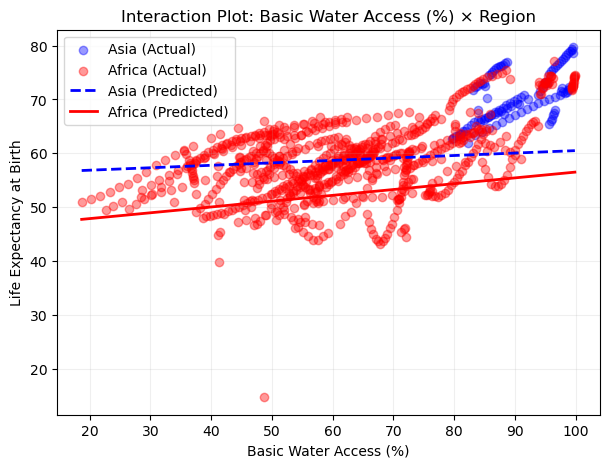

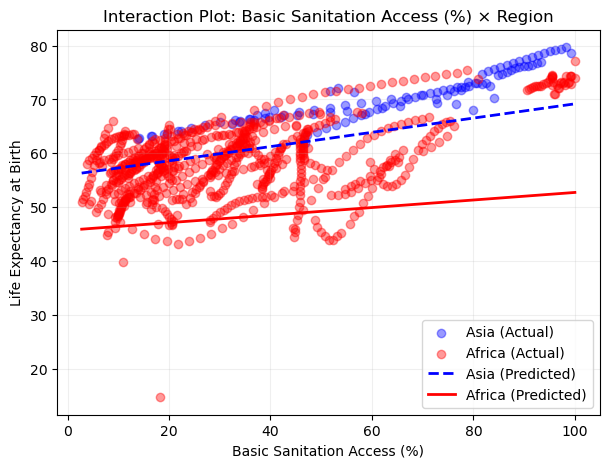

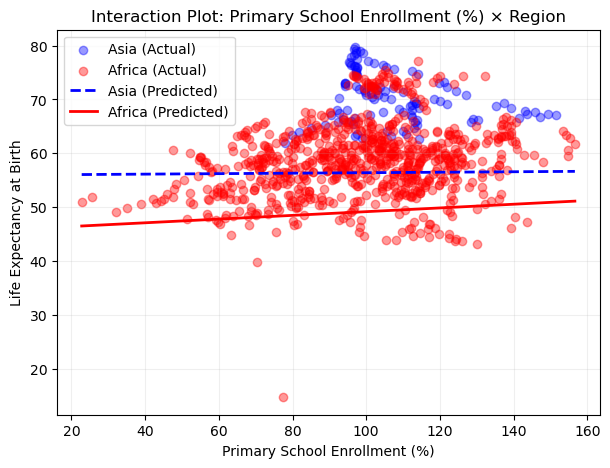

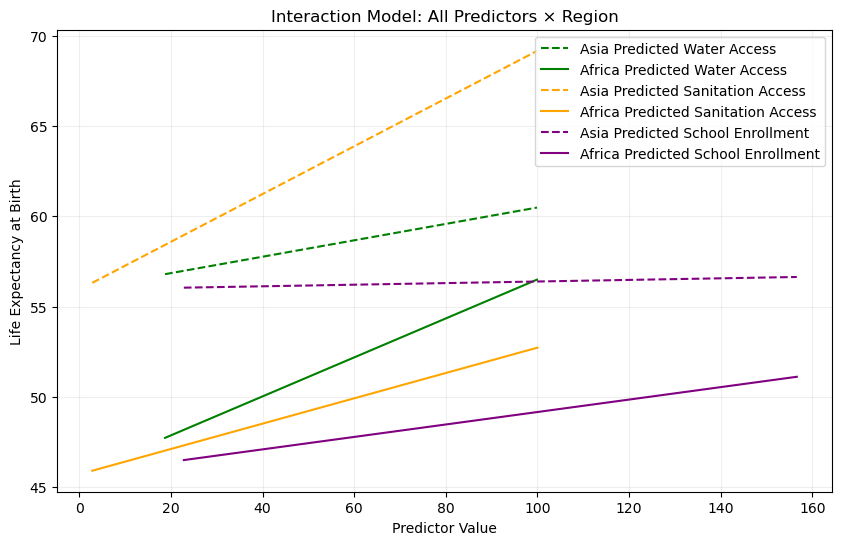

In [80]:
# Map each X variable to its correct interaction variable name
interaction_map = {
    "basic_water_access_pct": "water_x_region",
    "basic_sanitation_access_pct": "sanitation_x_region",
    "primary_school_enrollment": "school_x_region"
}

# Colors by region
colors = df_clean["Binary_subsaharan_africa"].map({0: "blue", 1: "red"})

def plot_interaction(x_var, x_label):
    x_range = np.linspace(df_clean[x_var].min(), df_clean[x_var].max(), 100)
    interaction_name = interaction_map[x_var]

    # Predictions for Asia (region = 0)
    asia_pred = model_interaction.params["const"] + model_interaction.params[x_var] * x_range

    # Predictions for Africa (region = 1)
    africa_pred = (
        model_interaction.params["const"]
        + model_interaction.params["Binary_subsaharan_africa"]
        + model_interaction.params[x_var] * x_range
        + model_interaction.params[interaction_name] * x_range
    )

    # Plot
    plt.figure(figsize=(7, 5))
    plt.scatter(
        df_clean.loc[df_clean["Binary_subsaharan_africa"]==0, x_var],
        df_clean.loc[df_clean["Binary_subsaharan_africa"]==0, "life_expectancy_birth"],
        c="blue", alpha=0.4, label="Asia (Actual)"
    )
    plt.scatter(
        df_clean.loc[df_clean["Binary_subsaharan_africa"]==1, x_var],
        df_clean.loc[df_clean["Binary_subsaharan_africa"]==1, "life_expectancy_birth"],
        c="red", alpha=0.4, label="Africa (Actual)"
    )
    plt.plot(x_range, asia_pred, "b--", label="Asia (Predicted)", linewidth=2)
    plt.plot(x_range, africa_pred, "r-", label="Africa (Predicted)", linewidth=2)

    plt.xlabel(x_label)
    plt.ylabel("Life Expectancy at Birth")
    plt.title(f"Interaction Plot: {x_label} × Region")
    plt.legend()
    plt.grid(alpha=0.2)
    plt.show()

# 1️⃣ Water Access
plot_interaction("basic_water_access_pct", "Basic Water Access (%)")

# 2️⃣ Sanitation Access
plot_interaction("basic_sanitation_access_pct", "Basic Sanitation Access (%)")

# 3️⃣ Primary School Enrollment
plot_interaction("primary_school_enrollment", "Primary School Enrollment (%)")

# 4️⃣ Combined plot for all three predictors
plt.figure(figsize=(10,6))
for x_var, color, label in zip(
    ["basic_water_access_pct", "basic_sanitation_access_pct", "primary_school_enrollment"],
    ["green", "orange", "purple"],
    ["Water Access", "Sanitation Access", "School Enrollment"]
):
    x_range = np.linspace(df_clean[x_var].min(), df_clean[x_var].max(), 100)
    interaction_name = interaction_map[x_var]
    asia_pred = model_interaction.params["const"] + model_interaction.params[x_var] * x_range
    africa_pred = (
        model_interaction.params["const"]
        + model_interaction.params["Binary_subsaharan_africa"]
        + model_interaction.params[x_var] * x_range
        + model_interaction.params[interaction_name] * x_range
    )
    plt.plot(x_range, asia_pred, linestyle="--", color=color, label=f"Asia Predicted {label}")
    plt.plot(x_range, africa_pred, linestyle="-", color=color, label=f"Africa Predicted {label}")

plt.xlabel("Predictor Value")
plt.ylabel("Life Expectancy at Birth")
plt.title("Interaction Model: All Predictors × Region")
plt.legend()
plt.grid(alpha=0.2)
plt.show()